<a href="https://colab.research.google.com/github/Xzhangsci/422/blob/master/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# this code is writtin on CoLab at Google drive since my laptop has Python3.8 while tensorflow was not released to 3.8
# below is to load tensorflow2.0 to keep it updated
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
print(tf.__version__, keras.__version__)

2.1.0 2.2.4-tf


In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

RANDOM_SEED = 42
SET_FIT_INTERCEPT = True

In [0]:
# Load the data option 1 from the online mnist package for a full set of train and test data
# outcome is data0 to (X_train0, y_train0),(X_test, y_test) 
# data0 = keras.datasets.mnist
# type(data0)
# (X_train0, y_train0),(X_test, y_test)=data0.load_data()
# print(X_train0.shape, y_train0.shape, X_test.shape, y_test.shape)
# print(type(X_train0), X_train0.dtype, X_train0[0,0,0].dtype)

In [24]:
# Load the data option 2 for the Kaggle competition for train and test(no y) data 
from google.colab import files
uploaded = files.upload()

In [132]:
df_data1 = pd.read_csv('train.csv')
df_data2 = pd.read_csv('test.csv')
X_train0 = df_data1.drop(labels = ["label"], axis = 1) 
y_train0 = df_data1['label']
# Reshape data
X_train0 = X_train0.values.reshape(-1, 28, 28)
# One-Hot encoding
X_test = df_data2
X_test = X_test.values.reshape(-1, 28, 28)
#print(X_train0.shape, y_train0.shape, X_test.shape.shape)
print(type(X_train0), X_train0.dtype, X_train0[0,0,0].dtype)

<class 'numpy.ndarray'> int64 int64


In [133]:
# Making sure that the values are float so that we can get decimal points after division
X_train0 = X_train0.astype('float32')
X_test = X_test.astype('float32')
print(type(X_train0), X_train0.dtype, X_train0[0].dtype)

<class 'numpy.ndarray'> float32 float32


In [134]:
# Normalizing the RGB codes by dividing it to the max RGB value
# Dividing to 255 (which is the maximum RGB code minus the minimum RGB code)
X_train0 /= 255
X_test /= 255
print(X_train0.shape, y_train0.shape, X_test.shape)

(42000, 28, 28) (42000,) (28000, 28, 28)


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train0, y_train0, test_size=1/10, random_state=RANDOM_SEED)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, X_test.shape)

(37800, 28, 28) (4200, 28, 28) (37800,) (4200,) (28000, 28, 28)


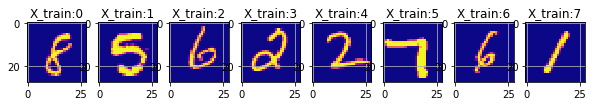

22460    8
20828    5
32032    6
6194     2
12768    2
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 37800, dtype: int64 int64


In [86]:
# print some image from train file
fig, axs = plt.subplots(1, 8, figsize=(10, 4))
for ax, i in zip(axs, range(0,8)):
    ax.imshow(np.reshape(np.array(X_train[i]), (28,28)), cmap='plasma')
    ax.set_title('X_train:'+str(i))
    ax.grid(True)
plt.show()
print(y_train, y_train.dtype)    

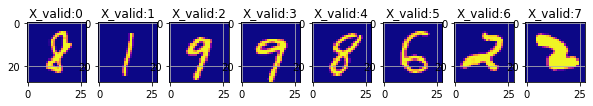

5457     8
38509    1
25536    9
31803    9
39863    8
        ..
16041    4
4867     2
28123    7
3780     7
7155     5
Name: label, Length: 4200, dtype: int64 int64


In [85]:
fig, axs = plt.subplots(1, 8, figsize=(10, 4))
for ax, i in zip(axs, range(0,8)):
    ax.imshow(np.reshape(np.array(X_valid[i]), (28,28)), cmap='plasma')
    ax.set_title('X_valid:'+str(i))
    ax.grid(True)
plt.show()
print(y_valid, y_valid.dtype)

In [88]:
input_shape = (28, 28)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_valid', X_valid.shape[0])
print('Number of images in X_test', X_test.shape[0])

Number of images in X_train 37800
Number of images in X_valid 4200
Number of images in X_test 28000


In [0]:
# Importing the required Keras modules containing model and layers
# Creating a Sequential Model and adding the layers
model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# Flattening the 2D arrays for fully connected layers
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
# the final Dense layer must have 10 neurons since we have 10 number classes
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [110]:
model.layers

In [111]:
model.summary()
#235500=28*28*300+300
#30100=300*100+100
#1010=100*10+10

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


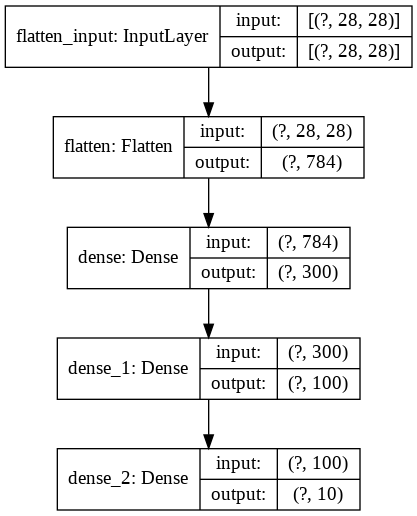

In [112]:
keras.utils.plot_model(model, show_shapes=True)

In [0]:
hidden1 = model.layers[1]
hidden2 = model.layers[2]
hidden3 = model.layers[3]
weights1,biases1 = hidden1.get_weights()
weights2,biases2 = hidden2.get_weights()
weights3,biases3 = hidden3.get_weights()

In [69]:
weights1

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [100]:
weights2

array([[ 0.01835579, -0.07372817,  0.04992647, ..., -0.05717973,
         0.06312802,  0.03272299],
       [-0.09408142, -0.09319659, -0.06018685, ...,  0.09630845,
         0.02668519, -0.07452354],
       [ 0.05840964,  0.0354368 , -0.01092584, ..., -0.02297685,
        -0.04184046, -0.00757462],
       ...,
       [ 0.03578977, -0.08830515,  0.07290968, ...,  0.0216084 ,
        -0.06387907,  0.02742993],
       [-0.09415827,  0.11326052, -0.03006794, ...,  0.08204401,
         0.10711684,  0.05425344],
       [ 0.11843706,  0.06329667, -0.02823869, ..., -0.06895281,
        -0.04317106, -0.11561107]], dtype=float32)

In [116]:
weights3

array([[ 1.12742752e-01,  6.00438714e-02, -2.25429326e-01,
        -7.32669234e-02,  4.96883690e-03, -5.71009815e-02,
        -1.99350551e-01, -2.23567635e-01, -9.94094461e-02,
        -1.35171115e-02],
       [ 9.04370248e-02, -1.99351788e-01,  2.02026099e-01,
        -1.36191919e-01,  9.39141810e-02, -1.93547606e-02,
         1.67981148e-01,  2.00545996e-01, -1.38766289e-01,
         1.25488609e-01],
       [ 4.67847884e-02, -1.07247218e-01,  1.78341419e-01,
        -2.08489627e-01, -3.60859334e-02,  1.82345212e-01,
         1.34853154e-01, -1.86066300e-01, -1.42891139e-01,
        -1.03244305e-01],
       [-4.89864200e-02, -1.76399082e-01, -5.41257560e-02,
         2.08106577e-01,  1.28894538e-01,  2.07589895e-01,
        -2.13480458e-01, -1.18598342e-02,  7.23187029e-02,
         3.06938589e-02],
       [-1.68816119e-01, -9.32020694e-02, -7.88614601e-02,
        -1.73261091e-01,  6.70591891e-02, -2.11411119e-02,
         8.81972015e-02, -9.24687833e-02, -3.95725667e-03,
        -1.

In [101]:
biases1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [105]:
biases2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [117]:
biases3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [118]:
print(weights1.shape, biases1.shape, weights2.shape, biases2.shape, weights3.shape, biases3.shape,)

(784, 300) (300,) (300, 100) (100,) (100, 10) (10,)


In [119]:
#optimizer could be adam
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
cnnfit = model.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_valid,y_valid))

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 5s 132us/sample - loss: 0.7266 - accuracy: 0.8162 - val_loss: 0.3813 - val_accuracy: 0.8929
Epoch 2/30
37800/37800 [==============================] - 5s 123us/sample - loss: 0.3236 - accuracy: 0.9065 - val_loss: 0.3099 - val_accuracy: 0.9093
Epoch 3/30
37800/37800 [==============================] - 5s 124us/sample - loss: 0.2685 - accuracy: 0.9226 - val_loss: 0.2755 - val_accuracy: 0.9202
Epoch 4/30
37800/37800 [==============================] - 5s 125us/sample - loss: 0.2345 - accuracy: 0.9337 - val_loss: 0.2491 - val_accuracy: 0.9274
Epoch 5/30
37800/37800 [==============================] - 5s 127us/sample - loss: 0.2082 - accuracy: 0.9403 - val_loss: 0.2235 - val_accuracy: 0.9383
Epoch 6/30
37800/37800 [==============================] - 5s 120us/sample - loss: 0.1874 - accuracy: 0.9457 - val_loss: 0.2107 - val_accuracy: 0.9407
Epoch 7/30
37800/37800 [===========================

In [75]:
cnnfit.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 38500,
 'steps': 1204,
 'verbose': 0}

In [76]:
len(cnnfit.epoch)

30

In [77]:
cnnfit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

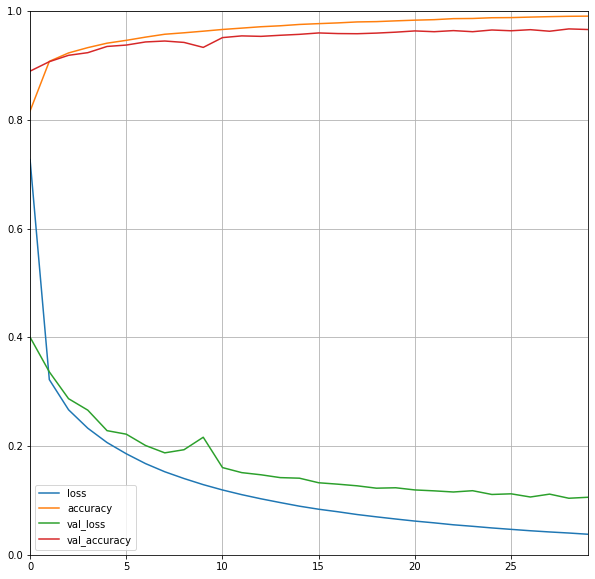

In [78]:
pd.DataFrame(cnnfit.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('cnnfit plot')
plt.show()

In [0]:
outcome_c = model.predict_classes(X_test)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [0]:
submission=pd.DataFrame()
submission['Label']=outcome_c
submission['ImageId']=range(1, 28001)
submission.set_index(['ImageId'], inplace=True)

In [167]:
print(submission.head())

         Label
ImageId       
1            2
2            0
3            9
4            9
5            3


In [0]:
pd.DataFrame(submission).to_csv(r'C:\Users\xzhan\Downloads\SubmissionCNN')